In [16]:
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def get_prediction(yhat):

    # return ["rose", "tulip"][yhat.index(1)]
    return ["rose", "tulip"][np.argmax(yhat[0])]


In [11]:
model = load_model("../models/rose_tulip.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [36]:

image_path = "../archive/flowers/outer/960x0.webp"
# image_path = "../archive/flowers/outer/tulip-care-guide-hero._TTW_._CR434,0,2133,1200_._SR1500,844_._QL100_.jpg"
image_path = "../archive/flowers/outer/EMMIEGRAY_MWH_CLASSIC_INFINITY_VIBRANTRED_600x600.png"
# image_path = "../archive/flowers/outer/purple-rose.jpg"
image = cv2.imread(image_path)

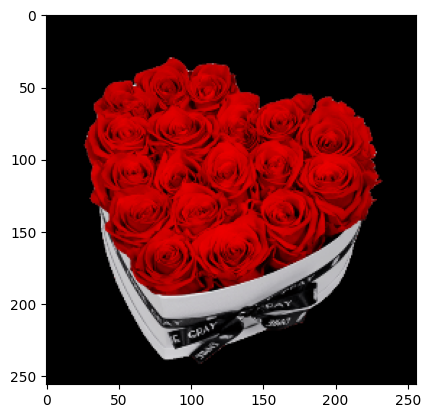

In [37]:
resized = cv2.resize(image, (256, 256))
# change color space
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resized/255.0, 0))
print(yhat)
print(np.argmax(yhat[0]))
print(f"Predicted class: {get_prediction(yhat)}")

1/1 [==============================] - 0s 22ms/step
[[1.000000e+00 6.089211e-15]]
0
Predicted class: rose
